In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import folium
from folium import plugins
from datetime import datetime

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\big blue\thalassa-mia-glende-exercises\Project2\Data\clean_data")
pd.set_option('display.max_columns', None)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Kitesurf
0,2018-01-01,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2018-01-02,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,No
2,2018-01-03,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,No
3,2018-01-04,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,No
4,2018-01-05,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           366 non-null    object 
 1   MinTemp        366 non-null    float64
 2   MaxTemp        366 non-null    float64
 3   Rainfall       366 non-null    float64
 4   Evaporation    366 non-null    float64
 5   Sunshine       363 non-null    float64
 6   WindGustDir    363 non-null    object 
 7   WindGustSpeed  364 non-null    float64
 8   WindDir9am     335 non-null    object 
 9   WindDir3pm     365 non-null    object 
 10  WindSpeed9am   359 non-null    float64
 11  WindSpeed3pm   366 non-null    int64  
 12  Humidity9am    366 non-null    int64  
 13  Humidity3pm    366 non-null    int64  
 14  Pressure9am    366 non-null    float64
 15  Pressure3pm    366 non-null    float64
 16  Cloud9am       366 non-null    int64  
 17  Cloud3pm       366 non-null    int64  
 18  Temp9am   

Creating a 'month' feature for our analysis

In [5]:
# To datetime
df['Date'] = pd.to_datetime(df['Date'])

# Month
df['Month'] = df['Date'].dt.month

Our months dictionary (You'll see..)

In [6]:
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 
          'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

#### Where we are

In [7]:
# Big Bay, Cape Town
bigbay = folium.Map(location=[-33.787674, 18.462444])

folium.Marker([-33.787674, 18.462444], radius=15).add_to(bigbay)
bigbay

For our kitesurf-beginners it is very important not to take off on a offshore wind. Based on our location, that wind is ENE

#### The Winds

In [8]:
# The wind df : removing the zeros and NaNs for the sake of the graphs
wind_df = df[(df['WindDir9am'] != 0) & (df['WindDir3pm'] != 0) & (df['WindGustDir'] != 0)]
wind_df.dropna(inplace = True)

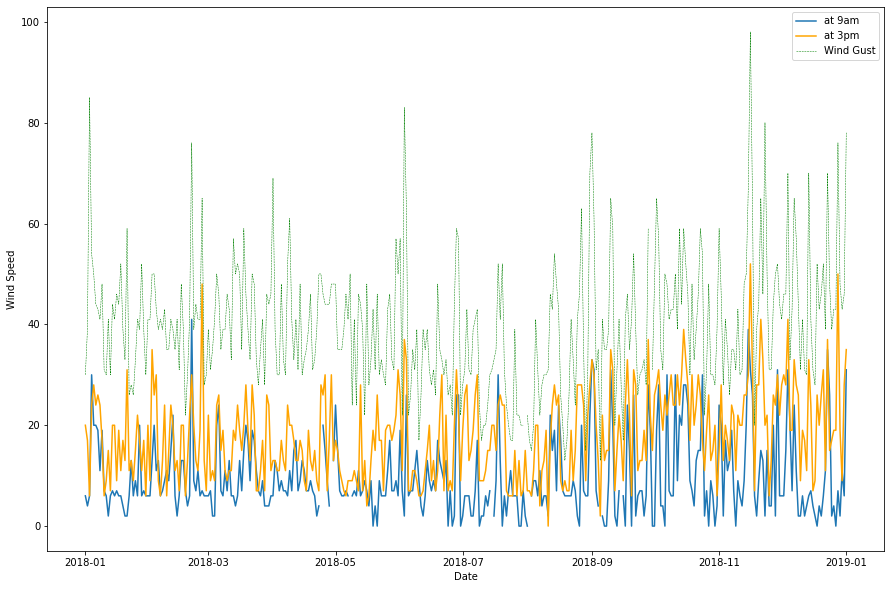

In [9]:
# Speed
plt.figure(figsize = (15,10))
sns.lineplot(x = 'Date', y = 'WindSpeed9am', data = df, label = 'at 9am')
sns.lineplot(x = 'Date', y = 'WindSpeed3pm', data = df, color = 'orange', label = 'at 3pm')
sns.lineplot(x = 'Date', y = 'WindGustSpeed', data = df, color = 'green', linestyle='--', lw = .5, label = 'Wind Gust')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

It seems that the winds in Cape Town are strongest in later hours with bigger highs and lows, from September to December 

In [12]:
# Month with highest wind speed on average : 9am
wind_df.groupby('Month')['WindSpeed9am'].mean().idxmax()

10

In [14]:
# Month with highest wind speed on average: 3pm
wind_df.groupby('Month')['WindSpeed3pm'].mean().idxmax()

10

In [16]:
x = wind_df.groupby('Month')['WindSpeed3pm'].mean().idxmax()

for key, value in months.items():
    if x==value:
        print('The month with the highest average wind speed in 2018 was {}'.format(key))

The month with the highest average wind speed in 2018 was October


In [20]:
# Highest wind speed : 9am
x = wind_df.groupby('Month')['WindSpeed9am'].max().max()

# Highest wind speed : 3pm
y = wind_df.groupby('Month')['WindSpeed3pm'].max().max()


print('The highest wind speed documented in 2018 was {}'.format(max(x,y)), 'km/h')

The highest wind speed documented in 2018 was 52 km/h


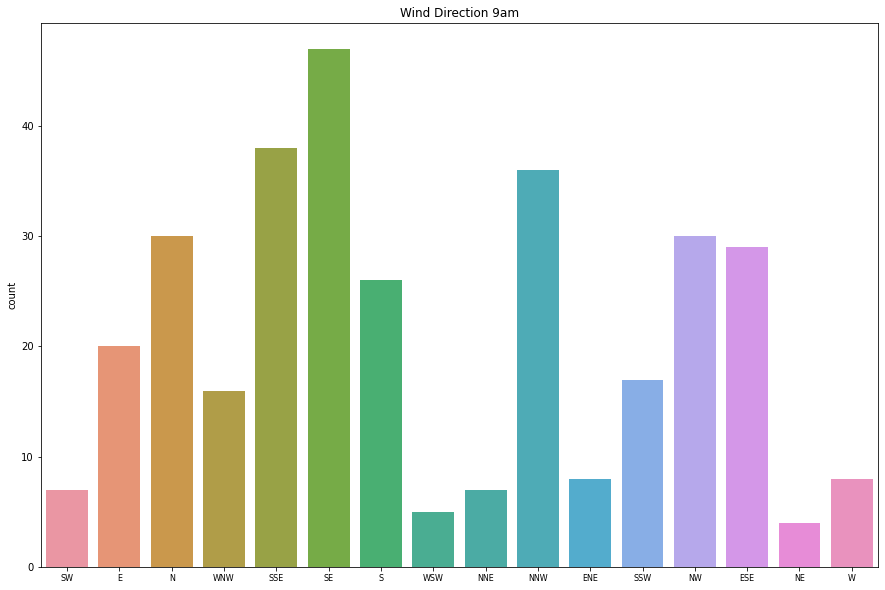

In [26]:
# Direction 9am
plt.figure(figsize = (15,10))
sns.countplot(data = wind_df, x = 'WindDir9am')
plt.title('Wind Direction 9am')
plt.xlabel(None)
plt.xticks(size = 8)
plt.show()

The "bad" wind for our beginners doesn't blow often over Cape Town in the morning

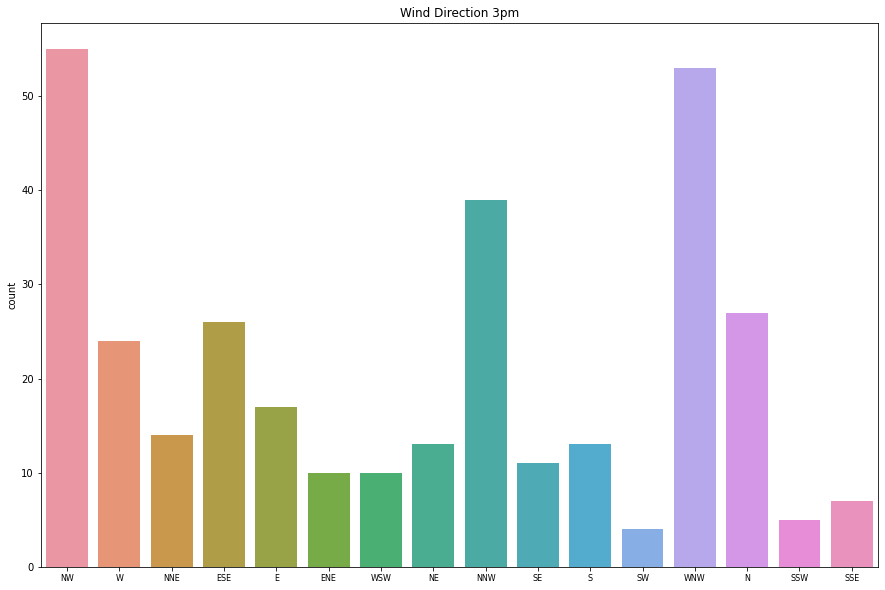

In [27]:
# Direction 3pm
plt.figure(figsize = (15,10))
sns.countplot(data = wind_df, x = 'WindDir3pm')
plt.title('Wind Direction 3pm')
plt.xlabel(None)
plt.xticks(size = 8)
plt.show()

.. nor in later hours

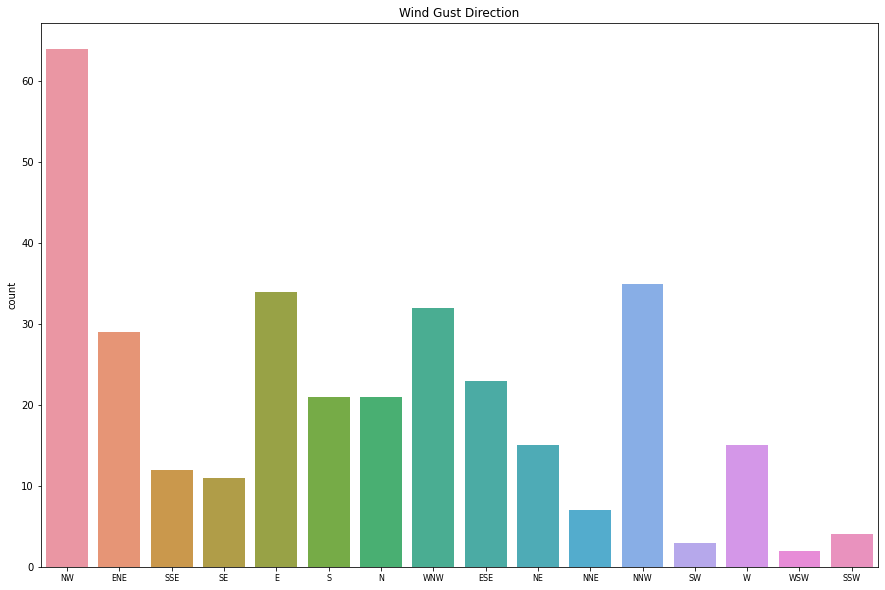

In [28]:
# Wind Gust
plt.figure(figsize = (15,10))
sns.countplot(data = wind_df, x = 'WindGustDir')
plt.title('Wind Gust Direction')
plt.xlabel(None)
plt.xticks(size = 8)
plt.show()

But it seems a large proportion of the gust winds have the direction ENE

#### The Temperatures

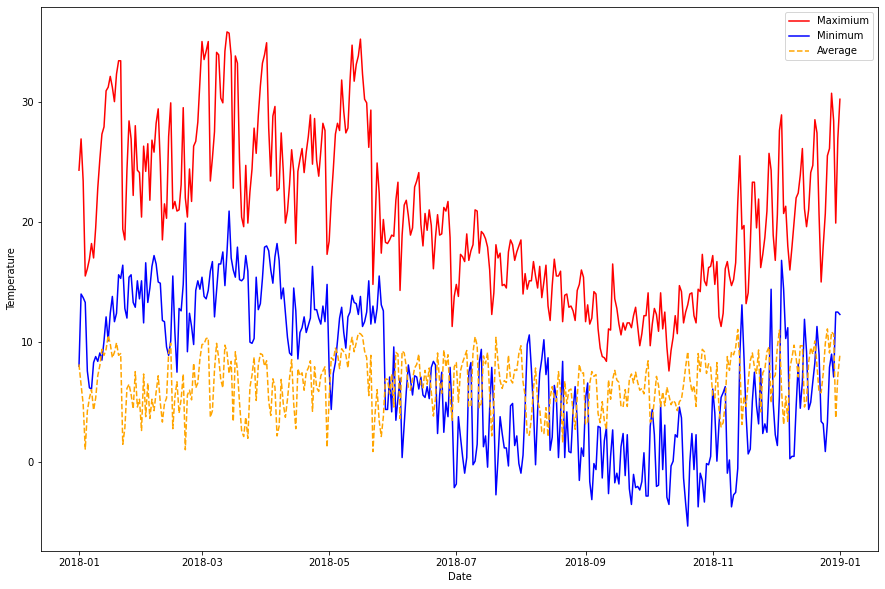

In [14]:
# Average Temperature
plt.figure(figsize = (15,10))
sns.lineplot(y = 'MaxTemp', x = 'Date', data = df, color = 'r', label = 'Maximium')
sns.lineplot(y = 'MinTemp', x = 'Date', data = df, color = 'b', label = 'Minimum')
sns.lineplot(y = (df['MaxTemp'] - df['MinTemp'])/2, x = 'Date', data = df, color = 'orange', linestyle = '--', label = 'Average')
plt.ylabel('Temperature')
plt.legend()
plt.show()

Cape Town's summer lasts from November to February before winter takes over from May to August

In [21]:
x = df['MaxTemp'].max()
y = int(df['Date'].dt.month.iloc[df['MaxTemp'].idxmax()])
z = df['MinTemp'].min()
h = int(df['Date'].dt.month.iloc[df['MinTemp'].idxmin()])

for key, value in months.items():
    if value == y:
        print("In 2018 the warmest day was in", "%s"%key, "with", x, "degrees Celsius")
    elif value == h:
        print("while the coldest was in", "%s"%key, "with", z, "degrees Celsius!")

In 2018 the warmest day was in March with 35.8 degrees Celsius
while the coldest was in October with -5.3 degrees Celsius!


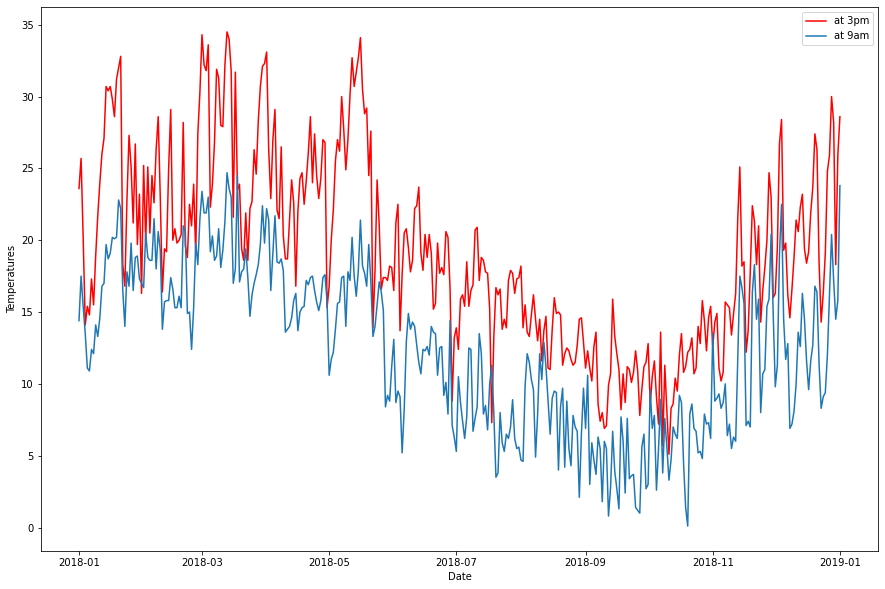

In [29]:
# Temperatures 9am vs.3pm
plt.figure(figsize = (15,10))
sns.lineplot(x = 'Date', y = 'Temp3pm', data = df, color = 'red', label = 'at 3pm')
sns.lineplot(x = 'Date', y = 'Temp9am', data = df, label = 'at 9am')
plt.ylabel('Temperatures')
plt.legend()
plt.show()

Of course, the 3pm temperatures are higher

#### The Rains

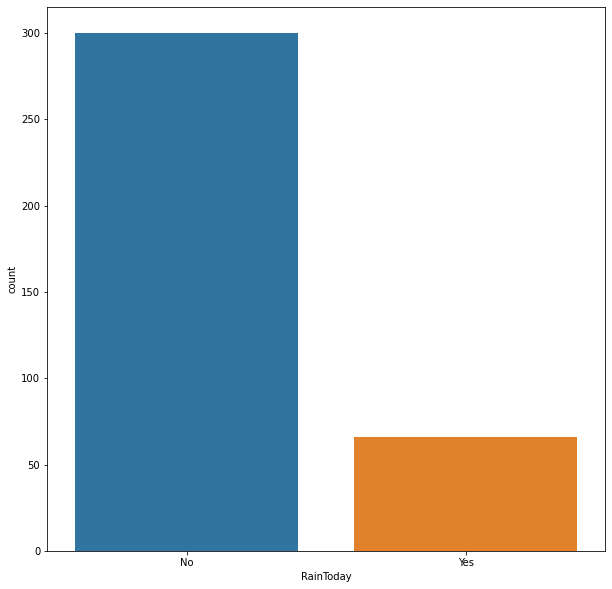

In [22]:
# Raining Today
plt.figure(figsize = (10,10))
sns.countplot(data = df, x = 'RainToday')
plt.show()

As expected, the non-rainy days are larger in number

In [24]:
# The rain df
rain_df = df[['Date', 'Month', 'RainToday']]

print("The total of rainy days in 2018 was", rain_df['RainToday'].value_counts()[1])

The total of rainy days in 2018 was 66


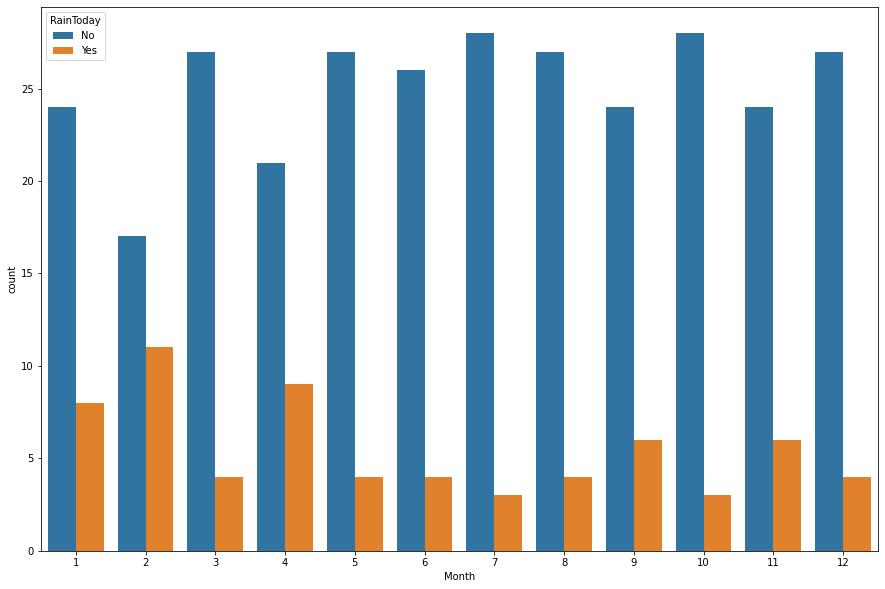

In [19]:
# Rain per Month
plt.figure(figsize = (15,10))
sns.countplot(x = 'Month', data = rain_df,  hue = 'RainToday')
plt.show()

In [35]:
rain = rain_df[rain_df['RainToday'] == 'Yes']
rainiest = rain.groupby('Month')['RainToday'].count().idxmax()
days = rain.groupby('Month')['RainToday'].count().max()

for key, value in months.items():
    if value == rainiest:
        print("The rainiest month in 2018 was", "%s"%key, "with a total of", days, "rainy days")

The rainiest month in 2018 was February with a total of 11 rainy days


In [37]:
# Average of rainy days per month
rain.groupby('Month')['RainToday'].count().mean()

5.5

#### The Suns

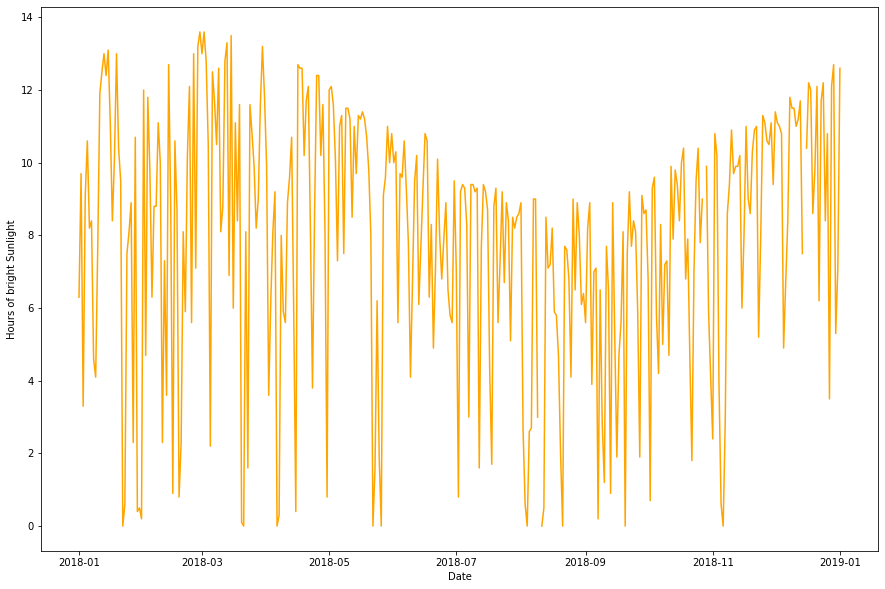

In [21]:
# Sunshine
plt.figure(figsize = (15,10))
sns.lineplot(y = 'Sunshine', x = 'Date', data = df, color = 'orange')
plt.ylabel('Hours of bright Sunlight')
plt.show()

We see a correlation between temperature and hours of sunlight

In [39]:
x = df['Sunshine'].max()
y = int(df['Month'].iloc[df['Sunshine'].idxmax()])

for key, value in months.items():
    if value == y:
        print("If you visit Big Bay in", str("%s"%key)+", make sure to bring sunblock because bright sunshine can last up to", round(x), "hours!")

If you visit Big Bay in February, make sure to bring sunblock because bright sunshine can last up to 14 hours!


#### Humidity 

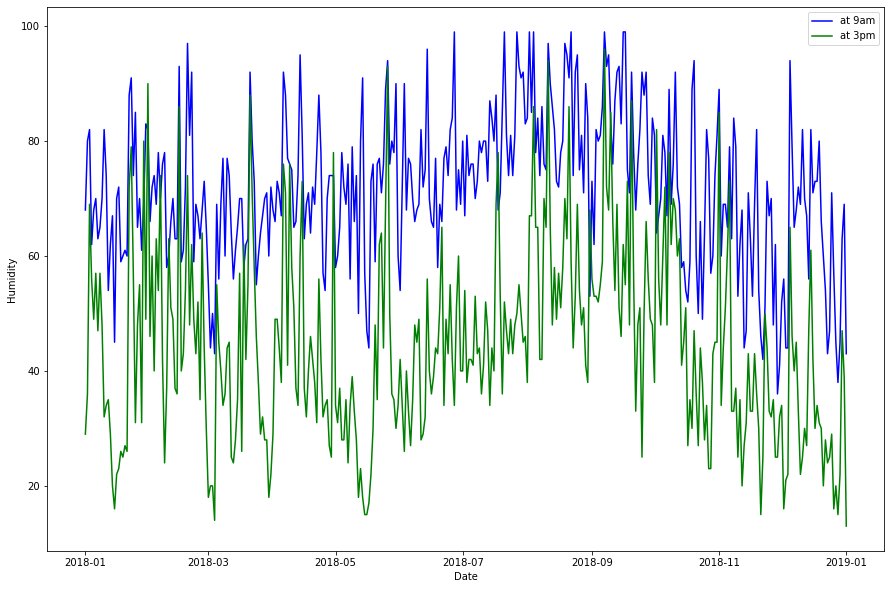

In [38]:
# Humidity at 9am vs.3pm
plt.figure(figsize = (15,10))
sns.lineplot(y = 'Humidity9am', x = 'Date', data = df, color = 'b', label = 'at 9am')
sns.lineplot(y = 'Humidity3pm', x = 'Date', data = df, color = 'green', label = 'at 3pm')
plt.ylabel('Humidity')
plt.legend()
plt.show()

Earlier hours have higher levels of humidity

#### The Clouds

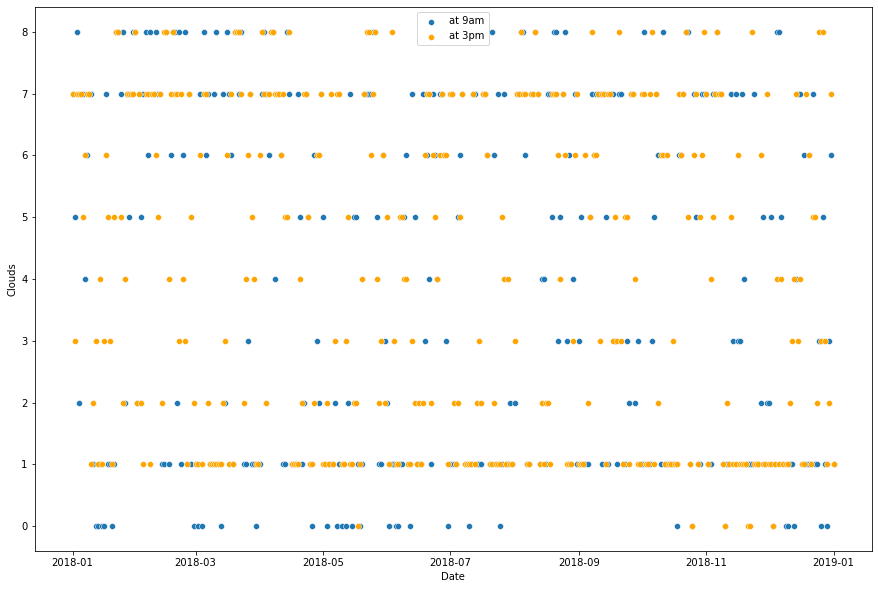

In [44]:
# The Clouds at 9am vs. 3pm
plt.figure(figsize = (15,10))
sns.scatterplot(x = 'Date', y = 'Cloud9am', data = df, label = 'at 9am')
sns.scatterplot(x = 'Date', y = 'Cloud3pm', data = df, color = 'orange', label = 'at 3pm')
plt.ylabel('Clouds')
plt.legend()
plt.show()

Apparently earlier hours have clearer skies

### Kitesurf

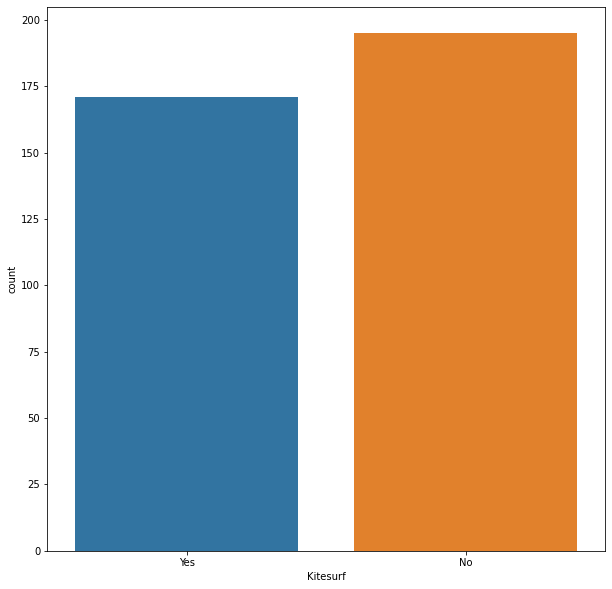

In [47]:
# Kitesurf 
plt.figure(figsize = (10,10))
sns.countplot(data = df, x = 'Kitesurf')
plt.show()

Seems the number of days that we "issue a warning" are larger than the ones our newbies can safely kitesurf. What can we say, safety comes first!

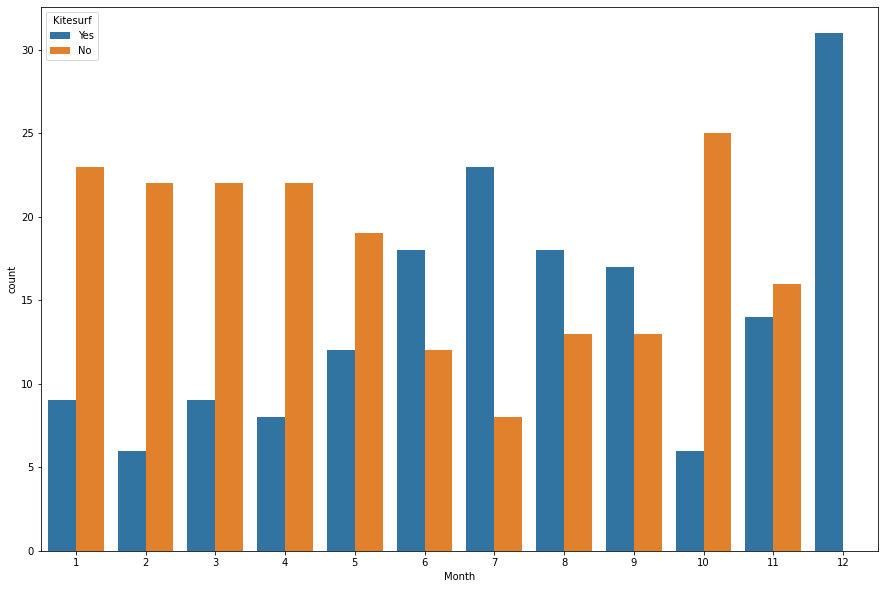

In [48]:
# Kitesurf per month
plt.figure(figsize = (15,10))
sns.countplot(x = 'Month', data = df,  hue = 'Kitesurf')
plt.show()

In [58]:
# Kitesurf dfs
yes = df[df['Kitesurf'] == 'Yes']
no = df[df['Kitesurf'] == 'No']

In [63]:
x = yes.groupby('Month')['Kitesurf'].count().max()
y = yes.groupby('Month')['Kitesurf'].count().idxmax()

for key, value in months.items():
    if y == value:
        print('In 2018 the best month for kitesurf was %s'%key, 'with a total of', x, 'good kitesurfing days')

In 2018 the best month for kitesurf was December with a total of 31 good kitesurfing days


In [64]:
x = no.groupby('Month')['Kitesurf'].count().max()
y = no.groupby('Month')['Kitesurf'].count().idxmax()

for key, value in months.items():
    if y == value:
        print('In 2018 the worst month for our newbies was %s'%key, 'with a total of', x, 'unfit for kitesurf days')

In 2018 the worst month for our newbies was October with a total of 25 unfit for kitesurf days


### Conclusion

We recommend our newbies to visit Big Bay for kitesurf in the summer based on the temperature and wind rates, excluding February as the rainiest month. Also, earlier hours seem more appropriate. 

Let's kite!

(if we had more data it is very likely that we would have different results)